«Линейные модели. Предсказание цены квартиры в зависимости от её характеристик»

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split

1.	Для выполнения задания использовать данные – https://www.kaggle.com/competitions/boston-dataset/data.

In [2]:
from IPython.display import display
data = pd.read_csv('boston_data.csv')
test_data = pd.read_csv('boston_test_data.csv')
display(data.head(10), test_data.head(10))

"""
Описание данных
The medv variable is the target variable.

Data description The Boston data frame has 506 rows and 14 columns.

This data frame contains the following columns:

crim per capita crime rate by town.

zn proportion of residential land zoned for lots over 25,000 sq.ft.

indus proportion of non-retail business acres per town.

chas Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).

nox nitrogen oxides concentration (parts per 10 million).

rm average number of rooms per dwelling.

age proportion of owner-occupied units built prior to 1940.

dis weighted mean of distances to five Boston employment centres.

rad index of accessibility to radial highways.

tax full-value property-tax rate per $10,000.

ptratio pupil-teacher ratio by town.

black 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town.

lstat lower status of the population (percent).

medv median value of owner-occupied homes in $1000s.
"""

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.15876,0.0,10.81,0.0,0.413,5.961,17.5,5.2873,4.0,305.0,19.2,376.94,9.88,21.7
1,0.10328,25.0,5.13,0.0,0.453,5.927,47.2,6.9320,8.0,284.0,19.7,396.90,9.22,19.6
2,0.34940,0.0,9.90,0.0,0.544,5.972,76.7,3.1025,4.0,304.0,18.4,396.24,9.97,20.3
3,2.73397,0.0,19.58,0.0,0.871,5.597,94.9,1.5257,5.0,403.0,14.7,351.85,21.45,15.4
4,0.04337,21.0,5.64,0.0,0.439,6.115,63.0,6.8147,4.0,243.0,16.8,393.97,9.43,20.5
5,0.08370,45.0,3.44,0.0,0.437,7.185,38.9,4.5667,5.0,398.0,15.2,396.90,5.39,34.9
6,0.19073,22.0,5.86,0.0,0.431,6.718,17.5,7.8265,7.0,330.0,19.1,393.74,6.56,26.2
7,0.26938,0.0,9.90,0.0,0.544,6.266,82.8,3.2628,4.0,304.0,18.4,393.39,7.90,21.6
8,10.06230,0.0,18.10,0.0,0.584,6.833,94.3,2.0882,24.0,666.0,20.2,81.33,19.69,14.1
9,1.41385,0.0,19.58,1.0,0.871,6.129,96.0,1.7494,5.0,403.0,14.7,321.02,15.12,17.0


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
0,0.07886,80.0,4.95,0.0,0.411,7.148,27.7,5.1167,4.0,245.0,19.2,396.90,3.56
1,0.08873,21.0,5.64,0.0,0.439,5.963,45.7,6.8147,4.0,243.0,16.8,395.56,13.45
2,1.38799,0.0,8.14,0.0,0.538,5.950,82.0,3.9900,4.0,307.0,21.0,232.60,27.71
3,0.30347,0.0,7.38,0.0,0.493,6.312,28.9,5.4159,5.0,287.0,19.6,396.90,6.15
4,0.22927,0.0,6.91,0.0,0.448,6.030,85.5,5.6894,3.0,233.0,17.9,392.74,18.80
5,0.06466,70.0,2.24,0.0,0.400,6.345,20.1,7.8278,5.0,358.0,14.8,368.24,4.97
6,0.13117,0.0,8.56,0.0,0.520,6.127,85.2,2.1224,5.0,384.0,20.9,387.69,14.09
7,1.23247,0.0,8.14,0.0,0.538,6.142,91.7,3.9769,4.0,307.0,21.0,396.90,18.72
8,0.43571,0.0,10.59,1.0,0.489,5.344,100.0,3.8750,4.0,277.0,18.6,396.90,23.09
9,0.08187,0.0,2.89,0.0,0.445,7.820,36.9,3.4952,2.0,276.0,18.0,393.53,3.57


'\nОписание данных\nThe medv variable is the target variable.\n\nData description The Boston data frame has 506 rows and 14 columns.\n\nThis data frame contains the following columns:\n\ncrim per capita crime rate by town.\n\nzn proportion of residential land zoned for lots over 25,000 sq.ft.\n\nindus proportion of non-retail business acres per town.\n\nchas Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).\n\nnox nitrogen oxides concentration (parts per 10 million).\n\nrm average number of rooms per dwelling.\n\nage proportion of owner-occupied units built prior to 1940.\n\ndis weighted mean of distances to five Boston employment centres.\n\nrad index of accessibility to radial highways.\n\ntax full-value property-tax rate per $10,000.\n\nptratio pupil-teacher ratio by town.\n\nblack 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town.\n\nlstat lower status of the population (percent).\n\nmedv median value of owner-occupied homes in $1000s.\n'

2.	Загрузить и исследовать данные. Вывести размерность данных, основные описательные статистики.

In [3]:
display(data.shape, data.describe(), "Дисперсия:", data.var(), test_data.shape, test_data.describe(),"Дисперсия:", test_data.var())

(404, 14)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.00000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.730912,10.509901,11.189901,0.069307,0.556710,6.30145,68.601733,3.799666,9.836634,411.688119,18.444554,355.068243,12.598936,22.312376
std,8.943922,22.053733,6.814909,0.254290,0.117321,0.67583,28.066143,2.109916,8.834741,171.073553,2.150295,94.489572,6.925173,8.837019
min,0.006320,0.000000,0.460000,0.000000,0.392000,3.56100,2.900000,1.169100,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082382,0.000000,5.190000,0.000000,0.453000,5.90275,45.800000,2.087875,4.000000,281.000000,17.375000,374.710000,7.135000,17.100000
50%,0.253715,0.000000,9.795000,0.000000,0.538000,6.23050,76.600000,3.207450,5.000000,330.000000,19.000000,391.065000,11.265000,21.400000
75%,4.053158,12.500000,18.100000,0.000000,0.631000,6.62925,94.150000,5.222125,24.000000,666.000000,20.200000,396.007500,16.910000,25.000000
max,88.976200,95.000000,27.740000,1.000000,0.871000,8.78000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,34.370000,50.000000


'Дисперсия:'

crim          79.993745
zn           486.367147
indus         46.442989
chas           0.064664
nox            0.013764
rm             0.456747
age          787.708359
dis            4.451745
rad           78.052650
tax        29266.160553
ptratio        4.623767
black       8928.279283
lstat         47.958014
medv          78.092899
dtype: float64

(102, 13)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
count,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000
mean,3.050534,14.745098,10.926373,0.068627,0.546713,6.218029,68.468627,3.776729,8.411765,394.568627,18.499020,363.034216,12.867451
std,7.068744,27.650824,7.067821,0.254068,0.110170,0.800174,28.613692,2.099225,8.124469,158.153736,2.232323,77.445957,7.972354
min,0.009060,0.000000,1.220000,0.000000,0.385000,4.138000,7.800000,1.129600,1.000000,188.000000,13.000000,21.570000,1.920000
25%,0.079613,0.000000,4.950000,0.000000,0.447000,5.819000,41.300000,2.113700,4.000000,276.000000,17.400000,376.695000,6.702500
50%,0.263765,0.000000,8.560000,0.000000,0.538000,6.034000,81.250000,3.055050,5.000000,333.500000,19.150000,392.790000,12.135000
75%,1.757370,20.000000,18.100000,0.000000,0.624000,6.477500,93.550000,5.117675,8.000000,437.000000,20.200000,396.900000,17.102500
max,45.746100,100.000000,27.740000,1.000000,0.871000,8.725000,100.000000,9.220300,24.000000,711.000000,21.200000,396.900000,37.970000


'Дисперсия:'

crim          49.967135
zn           764.568045
indus         49.954091
chas           0.064551
nox            0.012137
rm             0.640279
age          818.743362
dis            4.406747
rad           66.006989
tax        25012.604155
ptratio        4.983266
black       5997.876300
lstat         63.558435
dtype: float64

3.	Осуществить проверку данных на наличие пропущенных значений. Если пропущенные значения есть – заполнить их.

In [4]:
display("data:", data.isnull().sum(), "test:", test_data.isnull().sum())

'data:'

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
black      0
lstat      0
medv       0
dtype: int64

'test:'

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
black      0
lstat      0
dtype: int64

4.	Используя библиотеку seaborn, построить boxplot-объкеты для признаков. На основании этого сделать вывод о наличии выбросов в данных, очистить данные от выбросов.

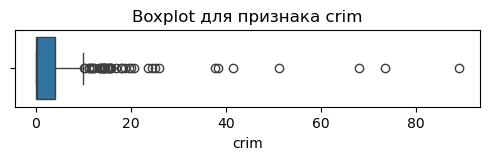

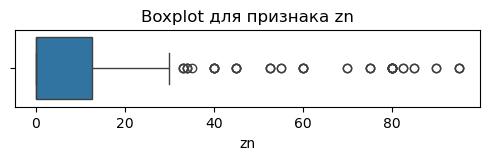

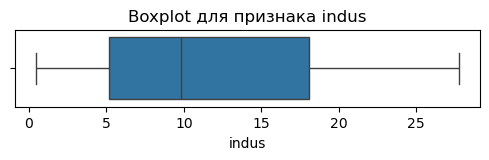

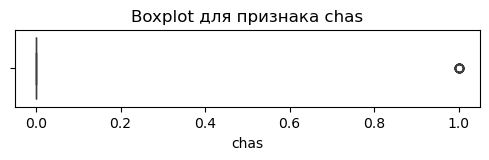

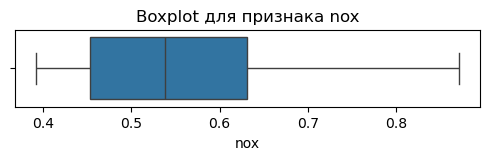

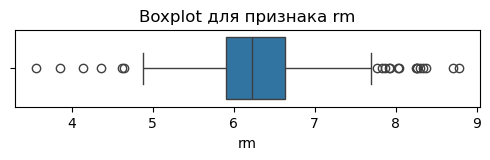

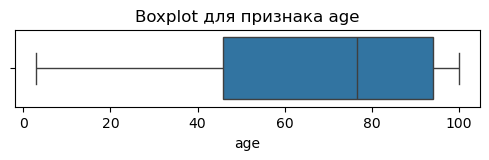

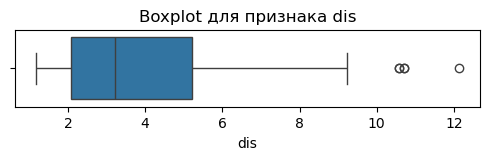

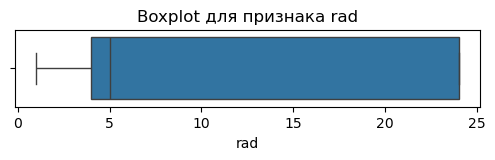

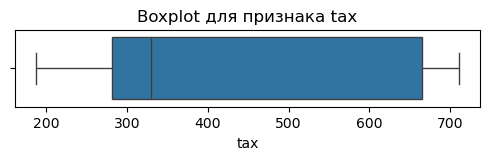

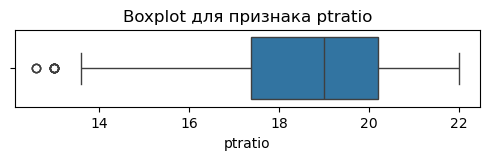

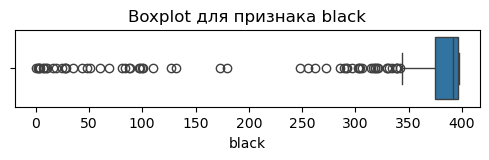

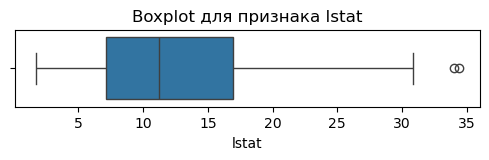

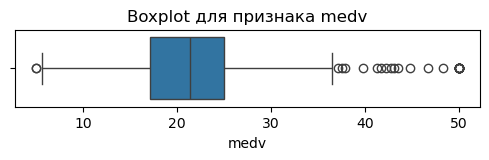

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Предположим, что ваши данные — это pandas DataFrame, например, data
# Построение boxplot для каждого числового признака
for column in data.select_dtypes(include='number').columns:
    plt.figure(figsize=(6, 1))
    sns.boxplot(x=data[column])
    plt.title(f'Boxplot для признака {column}')
    plt.show()

In [6]:
binary_columns = [col for col in data.columns if set(data[col].dropna().unique()).issubset({0.0, 1.0})]

# Остальные числовые признаки для очистки от выбросов
numeric_columns = [col for col in data.select_dtypes(include='number').columns if col not in binary_columns]

for column in numeric_columns:
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

5.	Используя библиотеку matplotlib, построить гистограммы распределения значений признаков.

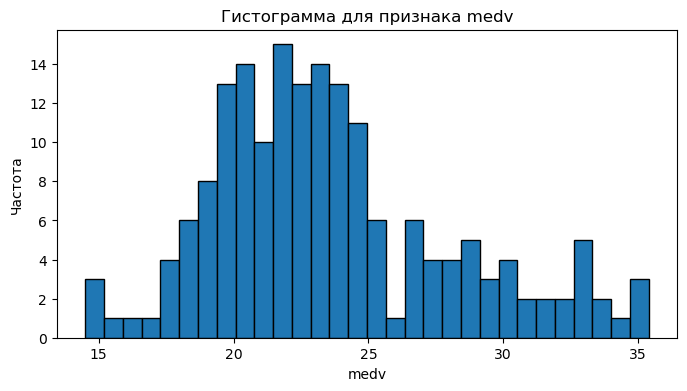

In [7]:
# Построение гистограммы
plt.figure(figsize=(8, 4))
plt.hist(data[column], bins=30, edgecolor='k')
plt.title(f'Гистограмма для признака {column}')
plt.xlabel(column)
plt.ylabel('Частота')
plt.show()

6.	Построить матрицу корреляций. Сделать выводы на основании полученных значений.

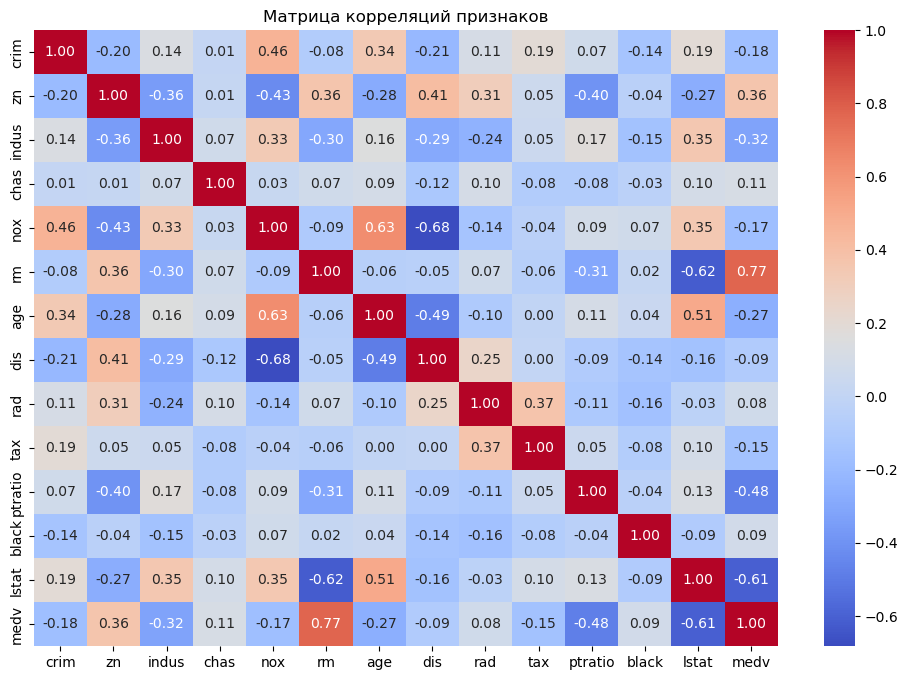

'\nЗначения, приближающиеся к +1 или -1, указывают на сильную положительную или отрицательную зависимость между признаками.\nЗначения около 0 означают отсутствие линейной зависимости.\nВажные выводы могут касаться сильных корреляций, которые могут указывать на избыточность признаков или необходимость их удаления/объединения.\n'

In [8]:
# Построение матрицы корреляций
corr_matrix = data.corr()

# Визуализация матрицы корреляций тепловой картой
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Матрица корреляций признаков')
plt.show()

"""
Значения, приближающиеся к +1 или -1, указывают на сильную положительную или отрицательную зависимость между признаками.
Значения около 0 означают отсутствие линейной зависимости.
Важные выводы могут касаться сильных корреляций, которые могут указывать на избыточность признаков или необходимость их удаления/объединения.
"""

7.	С помощью MinMaxScaler() выполнить масштабирование данных.

In [9]:
from sklearn.preprocessing import MinMaxScaler
number_columns = [col for col in numeric_columns if col != 'medv']

scaler = MinMaxScaler()

# Масштабируем только числовые признаки
data_scaled = data.copy()
data_scaled[number_columns] = scaler.fit_transform(data[number_columns])

# Для тестовых данных
test_data_scaled = test_data.copy()
test_data_scaled[number_columns] = scaler.transform(test_data[number_columns])

# Проверка
print("Минимальные значения после масштабирования:\n", data_scaled[number_columns].min())
print("Максимальные значения после масштабирования:\n", data_scaled[number_columns].max())

Минимальные значения после масштабирования:
 crim       0.0
zn         0.0
indus      0.0
nox        0.0
rm         0.0
age        0.0
dis        0.0
rad        0.0
tax        0.0
ptratio    0.0
black      0.0
lstat      0.0
dtype: float64
Максимальные значения после масштабирования:
 crim       1.0
zn         1.0
indus      1.0
nox        1.0
rm         1.0
age        1.0
dis        1.0
rad        1.0
tax        1.0
ptratio    1.0
black      1.0
lstat      1.0
dtype: float64


8.	Построить различные модели для предсказания цены квартиры и исследовать их. Осуществить процедуру кроссвалидации, сравнить построенные модели на основе метрики MSE.

Linear Regression: Средний MSE = 5.52, Стандартное отклонение = 1.28
Decision Tree: Средний MSE = 8.84, Стандартное отклонение = 2.08
Random Forest: Средний MSE = 5.65, Стандартное отклонение = 1.21
Gradient Boosting: Средний MSE = 4.93, Стандартное отклонение = 1.30


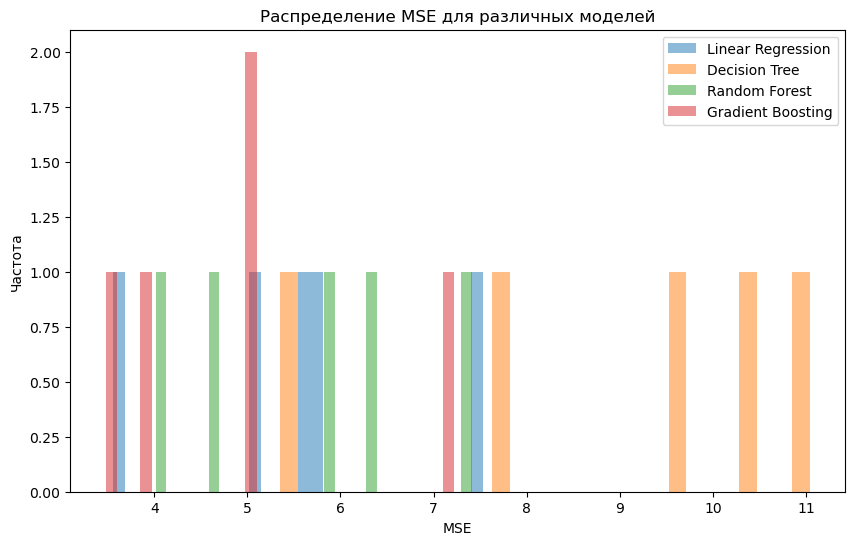

In [10]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_squared_error, make_scorer

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor

import matplotlib.pyplot as plt

# Определим признаки и целевую переменную
X = data.drop('medv', axis=1)
y = data['medv']

# Инициализация моделей
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42)
}

# Создаем scorer для MSE
mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)

# Проходим по моделям и оцениваем их с помощью кросс-валидации
results = {}
for name, model in models.items():
    scores = cross_val_score(model, X, y, cv=5, scoring=mse_scorer)
    results[name] = -scores  # возвращаем положительное значение MSE
    print(f"{name}: Средний MSE = {results[name].mean():.2f}, Стандартное отклонение = {results[name].std():.2f}")

plt.figure(figsize=(10, 6))
for name, scores in results.items():
    plt.hist(scores, alpha=0.5, label=name, bins=30)

plt.xlabel('MSE')
plt.ylabel('Частота')
plt.title('Распределение MSE для различных моделей')
plt.legend()
plt.show()

9.	Выбрать лучшую модель, обучить её на обучающей выборке и сделать предсказания цены квартиры на тестовой выборке.

In [11]:
#Подбор гиперпараметров (случайный лес)
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, scoring=mse_scorer)
grid_search.fit(X, y)

print("Лучшие гиперпараметры:", grid_search.best_params_)
best_rf = grid_search.best_estimator_

Лучшие гиперпараметры: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}


In [12]:
# Инициализация лучшей модели (случайный лес)
best_model = RandomForestRegressor(n_estimators=200, min_samples_split=2, random_state=42)

# Обучение модели на всей обучающей выборке
best_model.fit(X, y)

X_test = test_data
predictions = best_model.predict(X_test)
result = X_test.copy()
result['medv'] = predictions

display(result)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.07886,80.0,4.95,0.0,0.4110,7.148,27.7,5.1167,4.0,245.0,19.2,396.90,3.56,32.5440
1,0.08873,21.0,5.64,0.0,0.4390,5.963,45.7,6.8147,4.0,243.0,16.8,395.56,13.45,20.5950
2,1.38799,0.0,8.14,0.0,0.5380,5.950,82.0,3.9900,4.0,307.0,21.0,232.60,27.71,17.4205
3,0.30347,0.0,7.38,0.0,0.4930,6.312,28.9,5.4159,5.0,287.0,19.6,396.90,6.15,24.6425
4,0.22927,0.0,6.91,0.0,0.4480,6.030,85.5,5.6894,3.0,233.0,17.9,392.74,18.80,19.7355
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,0.06724,0.0,3.24,0.0,0.4600,6.333,17.2,5.2146,4.0,430.0,16.9,375.21,7.34,24.1185
98,2.92400,0.0,19.58,0.0,0.6050,6.101,93.0,2.2834,5.0,403.0,14.7,240.16,9.81,21.1220
99,0.32982,0.0,21.89,0.0,0.6240,5.822,95.4,2.4699,4.0,437.0,21.2,388.69,15.03,18.5860
100,0.01538,90.0,3.75,0.0,0.3940,7.454,34.2,6.3361,3.0,244.0,15.9,386.34,3.11,32.8150
